# Notes

This notebook checks how many pipes have been created so far for a chosen simulation using the scripts /u/cwalker/Illustris_Zhang_Method/batch_jobs/batch_scripts/submit_job_snapXX.sh



# Imports

In [23]:
from matplotlib import pyplot as plt
import os
import numpy as np


# Initialise

In [24]:
#The snapshots to check
snaps_to_check = [99,
                  91,
                  84,
                  78,
                  72,
                  67,
                  59,
                  50,
                  40,
                  33,
                  25,
                  21,
                  17]
#The simulation
sim_to_check = 'TNG300-1'
#sim_to_check = 'TNG100-2'

print('Will check {0} snapshots {1}'.format(sim_to_check,snaps_to_check))

Will check TNG300-1 snapshots [99, 91, 84, 78, 72, 67, 59, 50, 40, 33, 25, 21, 17]


# Find the files to load

In [25]:
#basedir = './' #current directory if not checking results of speed tests
basedir = './SpeedTest/' #speed tests directory created on 01/04/2022 (note data has placeholder subhalo IDs)
basedir = './SpeedTempTest/' #data with placeholder subhalo IDs and additional LoS WHIM information

print('Directory with data: {0}'.format(basedir))

all_files = os.listdir(basedir) #all files in current directory
npy_files = [i for i in all_files if '.npy' in i] #the numpy files
sim_files = [i for i in npy_files if sim_to_check in i] #those pertaining to desired simulation

#make sure to load files based on which version of the code is being tested
if '/SpeedTempTest/' in basedir:
    sim_files = [i for i in sim_files if 'SpeedTempTest' in i] #load whim version
elif '/SpeedTest/' in basedir:
    sim_files = [i for i in sim_files if 'SpeedTest' in i] #load version of data with impact factor information
else:
    sim_files = [i for i in sim_files if 'pID_test' in i] #load version of data with impact factor information

print('Pipe data files: {0}'.format(sim_files))    
print('In order:')
sim_files.sort()
sim_files = np.array(sim_files[::-1])
print(sim_files)

Directory with data: ./SpeedTempTest/
Pipe data files: ['Sim_TNG300-1_Snap_40_dDMdz_Output_SpeedTempTest.npy', 'Sim_TNG300-1_Snap_25_dDMdz_Output_SpeedTempTest.npy', 'Sim_TNG300-1_Snap_91_dDMdz_Output_SpeedTempTest.npy', 'Sim_TNG300-1_Snap_78_dDMdz_Output_SpeedTempTest.npy', 'Sim_TNG300-1_Snap_17_dDMdz_Output_SpeedTempTest.npy', 'Sim_TNG300-1_Snap_50_dDMdz_Output_SpeedTempTest.npy', 'Sim_TNG300-1_Snap_99_dDMdz_Output_SpeedTempTest.npy', 'Sim_TNG300-1_Snap_72_dDMdz_Output_SpeedTempTest.npy', 'Sim_TNG300-1_Snap_33_dDMdz_Output_SpeedTempTest.npy', 'Sim_TNG300-1_Snap_67_dDMdz_Output_SpeedTempTest.npy', 'Sim_TNG300-1_Snap_21_dDMdz_Output_SpeedTempTest.npy', 'Sim_TNG300-1_Snap_84_dDMdz_Output_SpeedTempTest.npy', 'Sim_TNG300-1_Snap_59_dDMdz_Output_SpeedTempTest.npy']
In order:
['Sim_TNG300-1_Snap_99_dDMdz_Output_SpeedTempTest.npy'
 'Sim_TNG300-1_Snap_91_dDMdz_Output_SpeedTempTest.npy'
 'Sim_TNG300-1_Snap_84_dDMdz_Output_SpeedTempTest.npy'
 'Sim_TNG300-1_Snap_78_dDMdz_Output_SpeedTempTest.npy'

# Load pipes

In [28]:
npipes_list =[]

for i in range(len(sim_files)):
    print(sim_files[i])
    try:
        datafile = sim_files[i]
        data = np.load(basedir+datafile,allow_pickle=True).tolist()
        npipes=len(data['dDMdz_Pakmor'])
        npipes_list.append(npipes)
    except:
        print('error! could not load.')
        npipes_list.append(-1000)
    
print(npipes_list)
print(sim_files)

Sim_TNG300-1_Snap_99_dDMdz_Output_SpeedTempTest.npy
Sim_TNG300-1_Snap_91_dDMdz_Output_SpeedTempTest.npy
Sim_TNG300-1_Snap_84_dDMdz_Output_SpeedTempTest.npy
Sim_TNG300-1_Snap_78_dDMdz_Output_SpeedTempTest.npy
Sim_TNG300-1_Snap_72_dDMdz_Output_SpeedTempTest.npy
Sim_TNG300-1_Snap_67_dDMdz_Output_SpeedTempTest.npy
Sim_TNG300-1_Snap_59_dDMdz_Output_SpeedTempTest.npy
Sim_TNG300-1_Snap_50_dDMdz_Output_SpeedTempTest.npy
Sim_TNG300-1_Snap_40_dDMdz_Output_SpeedTempTest.npy
Sim_TNG300-1_Snap_33_dDMdz_Output_SpeedTempTest.npy
Sim_TNG300-1_Snap_25_dDMdz_Output_SpeedTempTest.npy
Sim_TNG300-1_Snap_21_dDMdz_Output_SpeedTempTest.npy
Sim_TNG300-1_Snap_17_dDMdz_Output_SpeedTempTest.npy
[5125, 5125, 5125, 5125, 5125, 5125, 5125, 5125, 5125, 5125, 5125, 5125, 5125]
['Sim_TNG300-1_Snap_99_dDMdz_Output_SpeedTempTest.npy'
 'Sim_TNG300-1_Snap_91_dDMdz_Output_SpeedTempTest.npy'
 'Sim_TNG300-1_Snap_84_dDMdz_Output_SpeedTempTest.npy'
 'Sim_TNG300-1_Snap_78_dDMdz_Output_SpeedTempTest.npy'
 'Sim_TNG300-1_Snap_72_dD


# Plot

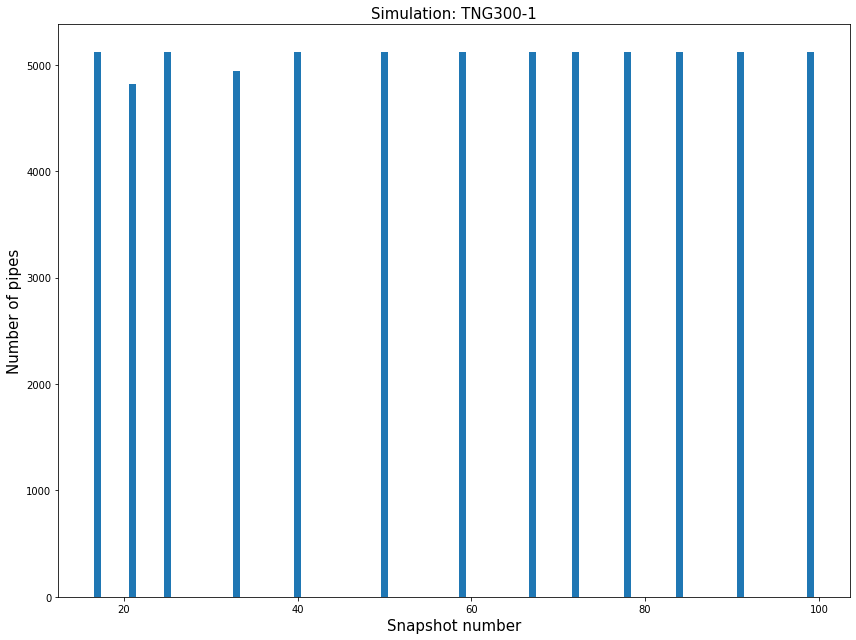

In [27]:
fig = plt.figure(figsize=(12,9))
ax=fig.add_subplot(111)
ax.set_title('Simulation: {0}'.format(sim_to_check),fontsize=15)
ax.set_xlabel('Snapshot number',fontsize=15)
ax.set_ylabel('Number of pipes',fontsize=15)

ax.bar(snaps_to_check[0:len(npipes_list)],npipes_list)

plt.tight_layout()
plt.show()

In [6]:
for i,x in enumerate(['a','s','g','k']):
    print(i,x)

0 a
1 s
2 g
3 k
